# Week 13: 檔案處理(下) - 資料分析小達人！

本筆記包含所有課程中的 Python 程式範例，包括：
- CSV 檔案處理
- Pandas 基礎操作
- 資料分析技巧
- 統計與圖表繪製

## 1. 建立 CSV 檔案

In [13]:
# 使用 Python 建立 CSV 檔案
content = """學號,姓名,國文,英文,數學
1001,小明,85,90,88
1002,小華,78,82,91
1003,小美,92,88,85
1004,小強,88,76,90
1005,小芳,95,93,89
"""

with open('grades.csv', 'w', encoding='utf-8') as file:
    file.write(content)

print("✅ CSV 檔案建立成功！")

✅ CSV 檔案建立成功！


## 2. 讀取 CSV 檔案（基本方法）

In [2]:
# 使用內建函式讀取 CSV
with open('grades.csv', 'r', encoding='utf-8') as file:
    lines = file.readlines()
    # 讀取標題列
    header = lines[0].strip().split(',')
    print(f"欄位名稱：{header}")
    # 讀取資料列
    for line in lines[1:]:
        data = line.strip().split(',')
        print(f"學號 {data[0]}: {data[1]} - "
              f"國文{data[2]}, 英文{data[3]}, 數學{data[4]}")

欄位名稱：['學號', '姓名', '國文', '英文', '數學']
學號 1001: 小明 - 國文85, 英文90, 數學88
學號 1002: 小華 - 國文78, 英文82, 數學91
學號 1003: 小美 - 國文92, 英文88, 數學85
學號 1004: 小強 - 國文88, 英文76, 數學90
學號 1005: 小芳 - 國文95, 英文93, 數學89


### 使用 `csv` 套件讀取 CSV 檔案 (以列表形式)

In [3]:
import csv

print("📊 以列表形式讀取 grades.csv：")
with open('grades.csv', 'r', encoding='utf-8') as file:
    reader = csv.reader(file)
    for row in reader:
        print(row)

📊 以列表形式讀取 grades.csv：
['學號', '姓名', '國文', '英文', '數學']
['1001', '小明', '85', '90', '88']
['1002', '小華', '78', '82', '91']
['1003', '小美', '92', '88', '85']
['1004', '小強', '88', '76', '90']
['1005', '小芳', '95', '93', '89']


### 使用 `csv` 套件讀取 CSV 檔案 (以字典形式)

In [4]:
import csv

print("\n📚 以字典形式讀取 grades.csv：")
with open('grades.csv', 'r', encoding='utf-8') as file:
    reader = csv.DictReader(file)
    for row in reader:
        print(row)
        # 也可以透過欄位名稱存取資料，例如：
        # print(f"姓名: {row['姓名']}, 國文: {row['國文']}")


📚 以字典形式讀取 grades.csv：
{'學號': '1001', '姓名': '小明', '國文': '85', '英文': '90', '數學': '88'}
{'學號': '1002', '姓名': '小華', '國文': '78', '英文': '82', '數學': '91'}
{'學號': '1003', '姓名': '小美', '國文': '92', '英文': '88', '數學': '85'}
{'學號': '1004', '姓名': '小強', '國文': '88', '英文': '76', '數學': '90'}
{'學號': '1005', '姓名': '小芳', '國文': '95', '英文': '93', '數學': '89'}


In [7]:
print(row)
print(row['學號'])
print(row['姓名'])

{'學號': '1005', '姓名': '小芳', '國文': '95', '英文': '93', '數學': '89'}
1005
小芳


### 使用 `csv` 套件將新資料以列表形式寫入 CSV 檔案 (追加模式)

In [14]:
import csv

# 要追加的學生資料 (列表形式)
new_student_list = ['1006', '小光', '77', '83', '80']

with open('grades.csv', 'a', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(new_student_list)

print(f"✅ 已將學生 {new_student_list[1]} 的資料追加到 grades.csv")

# 為了確認，我們可以重新讀取檔案並顯示最後幾行
print("\n📖 更新後的 grades.csv 內容 (最後兩行):")
with open('grades.csv', 'r', encoding='utf-8') as file:
    lines = file.readlines()
    for line in lines[-2:]:
        print(line.strip())

✅ 已將學生 小光 的資料追加到 grades.csv

📖 更新後的 grades.csv 內容 (最後兩行):
1005,小芳,95,93,89
1006,小光,77,83,80


### 使用 `csv` 套件將新資料以字典形式寫入 CSV 檔案 (追加模式)

In [15]:
import csv
import pandas as pd # 為了取得欄位名稱方便DictWriter使用

# 要追加的學生資料 (字典形式)
new_student_dict = {'學號': '1007', '姓名': '小萱', '國文': '90', '英文': '85', '數學': '92'}

# 為了DictWriter能夠正確寫入，我們需要先讀取現有檔案的欄位名稱作為fieldnames
df_temp = pd.read_csv('grades.csv')
fieldnames = df_temp.columns.tolist()

with open('grades.csv', 'a', newline='', encoding='utf-8') as file:
    writer = csv.DictWriter(file, fieldnames=fieldnames)
    writer.writerow(new_student_dict)

print(f"✅ 已將學生 {new_student_dict['姓名']} 的資料追加到 grades.csv")

# 為了確認，我們可以重新讀取檔案並顯示最後幾行
print("\n📖 更新後的 grades.csv 內容 (最後兩行):")
with open('grades.csv', 'r', encoding='utf-8') as file:
    lines = file.readlines()
    for line in lines[-2:]:
        print(line.strip())

✅ 已將學生 小萱 的資料追加到 grades.csv

📖 更新後的 grades.csv 內容 (最後兩行):
1006,小光,77,83,80
1007,小萱,90,85,92


## 3. Pandas DataFrame 基本操作

In [ ]:
!pip install pandas

In [16]:
import pandas as pd

# 讀取 CSV 檔案
df = pd.read_csv('grades.csv')

# 查看前幾筆資料
print("📊 前3筆資料：")
print(df.head(3))

# 查看資料結構
print("\n📋 資料資訊：")
print(df.info())

# 查看基本統計
print("\n📈 統計摘要：")
print(df.describe())

📊 前3筆資料：
     學號  姓名  國文  英文  數學
0  1001  小明  85  90  88
1  1002  小華  78  82  91
2  1003  小美  92  88  85

📋 資料資訊：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   學號      7 non-null      int64 
 1   姓名      7 non-null      object
 2   國文      7 non-null      int64 
 3   英文      7 non-null      int64 
 4   數學      7 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 412.0+ bytes
None

📈 統計摘要：
                學號         國文         英文         數學
count     7.000000   7.000000   7.000000   7.000000
mean   1004.000000  86.428571  85.285714  87.857143
std       2.160247   6.852181   5.648430   4.140393
min    1001.000000  77.000000  76.000000  80.000000
25%    1002.500000  81.500000  82.500000  86.500000
50%    1004.000000  88.000000  85.000000  89.000000
75%    1005.500000  91.000000  89.000000  90.500000
max    1007.000000  95.000000  93.000000  92.0000

In [17]:
# 顯示欄位名稱
print("欄位名稱：", df.columns.tolist())

# 顯示資料形狀（幾行幾列）
print(f"資料大小：{df.shape[0]} 列 × {df.shape[1]} 欄")

# 選取特定欄位
print("\n📝 學生姓名：")
print(df['姓名'])

# 選取多個欄位
print("\n📚 國文與英文成績：")
print(df[['姓名', '國文', '英文']])

欄位名稱： ['學號', '姓名', '國文', '英文', '數學']
資料大小：7 列 × 5 欄

📝 學生姓名：
0    小明
1    小華
2    小美
3    小強
4    小芳
5    小光
6    小萱
Name: 姓名, dtype: object

📚 國文與英文成績：
   姓名  國文  英文
0  小明  85  90
1  小華  78  82
2  小美  92  88
3  小強  88  76
4  小芳  95  93
5  小光  77  83
6  小萱  90  85


## 4. Series 操作

In [18]:
import pandas as pd

# 建立一個 Series
chinese_scores = pd.Series([85, 78, 92, 88, 95],
               index=['小明', '小華', '小美', '小強', '小芳'])

print(chinese_scores)

小明    85
小華    78
小美    92
小強    88
小芳    95
dtype: int64


In [19]:
# Series 是單一欄位的資料
math_scores = df['數學']

print("🔢 數學成績：")
print(math_scores)

# Series 的基本統計
print(f"\n數學平均：{math_scores.mean():.2f}")
print(f"數學最高：{math_scores.max()}")
print(f"數學最低：{math_scores.min()}")
print(f"數學中位數：{math_scores.median()}")

# Series 的運算
print("\n調整後成績（加5分）：")
print(math_scores + 5)

🔢 數學成績：
0    88
1    91
2    85
3    90
4    89
5    80
6    92
Name: 數學, dtype: int64

數學平均：87.86
數學最高：92
數學最低：80
數學中位數：89.0

調整後成績（加5分）：
0    93
1    96
2    90
3    95
4    94
5    85
6    97
Name: 數學, dtype: int64


## 5. 資料篩選（條件查詢）

In [20]:
# 篩選國文成績 >= 90 的學生
high_chinese = df[df['國文'] >= 90]
print("🌟 國文高分學生：")
print(high_chinese[['姓名', '國文']])

# 多條件篩選：國文 >= 85 且 英文 >= 85
excellent = df[(df['國文'] >= 85) & (df['英文'] >= 85)]
print("\n⭐ 雙科優秀學生：")
print(excellent[['姓名', '國文', '英文']])

# 篩選姓名包含「小」的學生
name_filter = df[df['姓名'].str.contains('小')]
print("\n👥 名字有「小」的學生：")
print(name_filter['姓名'])

🌟 國文高分學生：
   姓名  國文
2  小美  92
4  小芳  95
6  小萱  90

⭐ 雙科優秀學生：
   姓名  國文  英文
0  小明  85  90
2  小美  92  88
4  小芳  95  93
6  小萱  90  85

👥 名字有「小」的學生：
0    小明
1    小華
2    小美
3    小強
4    小芳
5    小光
6    小萱
Name: 姓名, dtype: object


## 6. 資料排序

In [21]:
# 按數學成績由高到低排序
sorted_math = df.sort_values('數學', ascending=False)
print("🏆 數學成績排行榜：")
print(sorted_math[['姓名', '數學']])

# 多欄位排序：先按國文，再按英文
sorted_multi = df.sort_values(['國文', '英文'],
                               ascending=[False, False])
print("\n📚 國文+英文排序：")
print(sorted_multi[['姓名', '國文', '英文']])

# 重設索引
sorted_math_reset = sorted_math.reset_index(drop=True)
print("\n重設索引後：")
print(sorted_math_reset)

🏆 數學成績排行榜：
   姓名  數學
6  小萱  92
1  小華  91
3  小強  90
4  小芳  89
0  小明  88
2  小美  85
5  小光  80

📚 國文+英文排序：
   姓名  國文  英文
4  小芳  95  93
2  小美  92  88
6  小萱  90  85
3  小強  88  76
0  小明  85  90
1  小華  78  82
5  小光  77  83

重設索引後：
     學號  姓名  國文  英文  數學
0  1007  小萱  90  85  92
1  1002  小華  78  82  91
2  1004  小強  88  76  90
3  1005  小芳  95  93  89
4  1001  小明  85  90  88
5  1003  小美  92  88  85
6  1006  小光  77  83  80


## 7. 新增計算欄位

In [22]:
# 計算總分
df['總分'] = df['國文'] + df['英文'] + df['數學']

# 計算平均
df['平均'] = df['總分'] / 3

# 判斷是否及格（平均 >= 60）
df['是否及格'] = df['平均'] >= 60

# 顯示結果
print("📊 完整成績表：")
print(df)

# 計算等第
def get_grade(avg):
    if avg >= 90: return 'A'
    elif avg >= 80: return 'B'
    elif avg >= 70: return 'C'
    elif avg >= 60: return 'D'
    else: return 'F'

df['等第'] = df['平均'].apply(get_grade)
print("\n📜 含等第的成績：")
print(df[['姓名', '平均', '等第']])

📊 完整成績表：
     學號  姓名  國文  英文  數學   總分         平均  是否及格
0  1001  小明  85  90  88  263  87.666667  True
1  1002  小華  78  82  91  251  83.666667  True
2  1003  小美  92  88  85  265  88.333333  True
3  1004  小強  88  76  90  254  84.666667  True
4  1005  小芳  95  93  89  277  92.333333  True
5  1006  小光  77  83  80  240  80.000000  True
6  1007  小萱  90  85  92  267  89.000000  True

📜 含等第的成績：
   姓名         平均 等第
0  小明  87.666667  B
1  小華  83.666667  B
2  小美  88.333333  B
3  小強  84.666667  B
4  小芳  92.333333  A
5  小光  80.000000  B
6  小萱  89.000000  B


## 8. 小練習 1 解答：資料篩選與排序

In [25]:
# 一：建立資料（使用前面的 grades.csv）
df = pd.read_csv('grades.csv')

# 二-1：數學最高分
max_math = df[df['數學'] == df['數學'].max()]
print("🥇 數學最高分：")
print(max_math[['姓名', '數學']])

# 二-2：平均 >= 85
df['平均'] = (df['國文'] + df['英文'] + df['數學']) / 3
high_avg = df[df['平均'] >= 85]
print("\n⭐ 平均 >= 85 的學生：")
print(high_avg[['姓名', '平均']])

# 二-3：全科及格
all_pass = df[(df['國文']>=60) & (df['英文']>=60) & (df['數學']>=60)]
print("\n✅ 全科及格學生：")
print(all_pass['姓名'])

🥇 數學最高分：
   姓名  數學
6  小萱  92

⭐ 平均 >= 85 的學生：
   姓名         平均
0  小明  87.666667
2  小美  88.333333
4  小芳  92.333333
6  小萱  89.000000

✅ 全科及格學生：
0    小明
1    小華
2    小美
3    小強
4    小芳
5    小光
6    小萱
Name: 姓名, dtype: object


In [26]:
# 三-1：計算總分與平均
df['總分'] = df['國文'] + df['英文'] + df['數學']
df['平均'] = df['總分'] / 3

# 三-2：排序與排名
df_sorted = df.sort_values('總分', ascending=False)
df_sorted['排名'] = range(1, len(df_sorted) + 1)
print("\n🏆 總分排行榜：")
print(df_sorted[['排名', '姓名', '總分', '平均']])

# 三-3：各科統計
print("\n📊 各科統計：")
subjects = ['國文', '英文', '數學']
for subject in subjects:
    print(f"{subject} - 最高: {df[subject].max()}, "
          f"最低: {df[subject].min()}, "
          f"平均: {df[subject].mean():.2f}")


🏆 總分排行榜：
   排名  姓名   總分         平均
4   1  小芳  277  92.333333
6   2  小萱  267  89.000000
2   3  小美  265  88.333333
0   4  小明  263  87.666667
3   5  小強  254  84.666667
1   6  小華  251  83.666667
5   7  小光  240  80.000000

📊 各科統計：
國文 - 最高: 95, 最低: 77, 平均: 86.43
英文 - 最高: 93, 最低: 76, 平均: 85.29
數學 - 最高: 92, 最低: 80, 平均: 87.86


## 9. Matplotlib 圖表繪製

In [28]:
# Google Colab 中文字體
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib

# 改style要在改font之前
# plt.style.use('seaborn')

matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

--2025-11-25 03:16:17--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 172.217.203.138, 172.217.203.102, 172.217.203.101, ...
Connecting to drive.google.com (drive.google.com)|172.217.203.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2025-11-25 03:16:17--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 192.178.219.132, 2607:f8b0:400c:c0d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|192.178.219.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  --.-KB/s    in 0.1s    

2025-11-25 

/tmp/ipython-input-4012675481.py:19: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Taipei Sans TC Beta.
  plt.tight_layout()
/tmp/ipython-input-4012675481.py:20: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Taipei Sans TC Beta.
  plt.savefig('chinese_scores.png')
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Taipei Sans TC Beta.
  fig.canvas.print_figure(bytes_io, **kw)


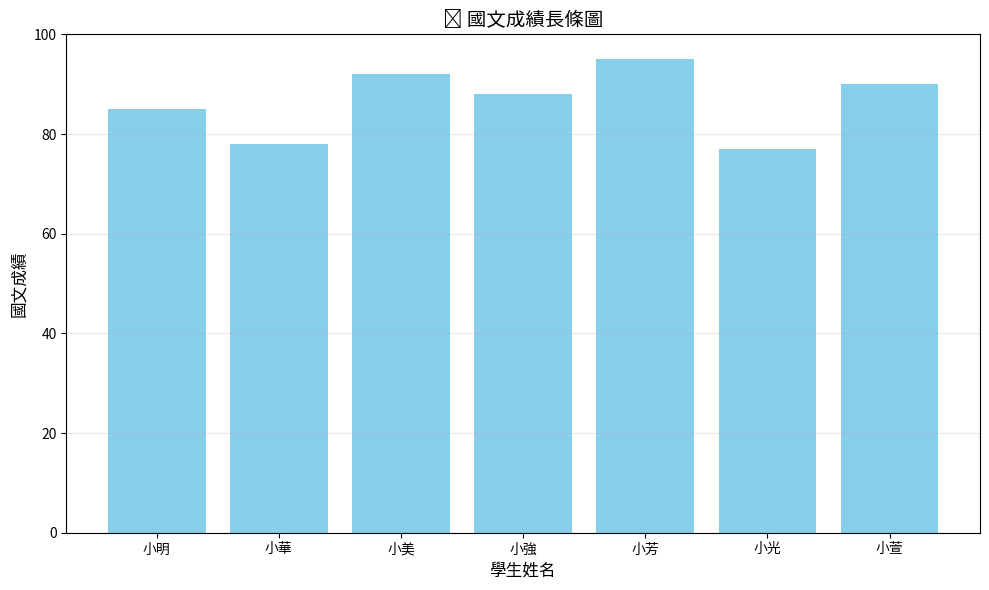

In [31]:
import matplotlib.pyplot as plt
import matplotlib

# 設定中文字型（避免中文顯示問題）
# matplotlib.rc('font', family='Microsoft JhengHei')
matplotlib.rc('font', family='Taipei Sans TC Beta')

# 讀取資料
df = pd.read_csv('grades.csv')

# 繪製國文成績長條圖
plt.figure(figsize=(10, 6))
plt.bar(df['姓名'], df['國文'], color='skyblue')
plt.xlabel('學生姓名', fontsize=12)
plt.ylabel('國文成績', fontsize=12)
plt.title('📊 國文成績長條圖', fontsize=14, fontweight='bold')
plt.ylim(0, 100)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('chinese_scores.png')
plt.show()

## 10. 繪製折線圖

/tmp/ipython-input-647364405.py:16: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Taipei Sans TC Beta.
  plt.tight_layout()
/tmp/ipython-input-647364405.py:17: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Taipei Sans TC Beta.
  plt.savefig('average_trend.png')
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Taipei Sans TC Beta.
  fig.canvas.print_figure(bytes_io, **kw)


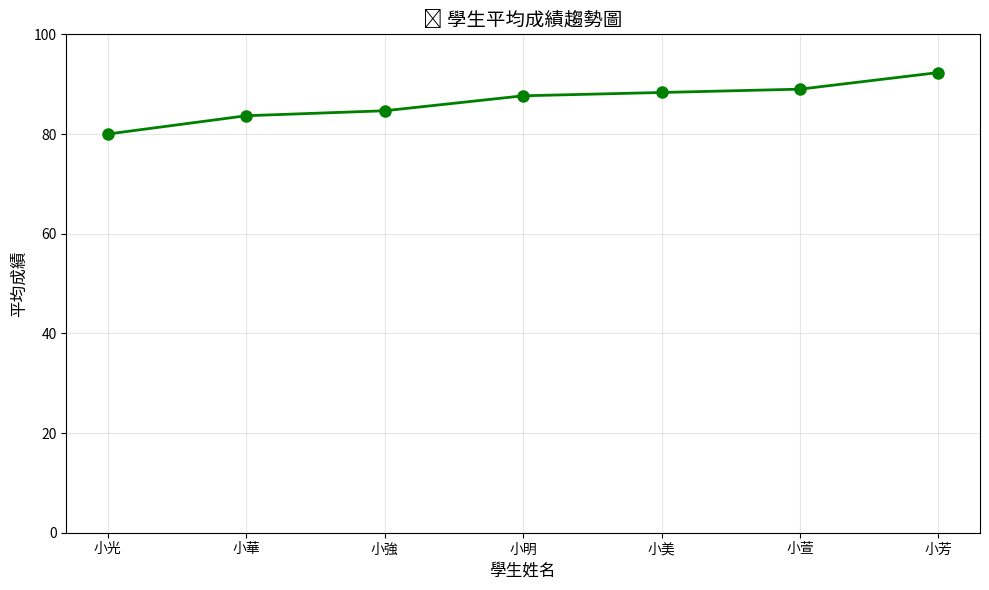

In [35]:
# 計算平均成績
df['平均'] = (df['國文'] + df['英文'] + df['數學']) / 3

# 按平均成績排序
df_sorted = df.sort_values('平均')

# 繪製折線圖
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['姓名'], df_sorted['平均'],
         marker='o', linewidth=2, markersize=8, color='green')
plt.xlabel('學生姓名', fontsize=12)
plt.ylabel('平均成績', fontsize=12)
plt.title('📈 學生平均成績趨勢圖', fontsize=14, fontweight='bold')
plt.ylim(0, 100)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('average_trend.png')
plt.show()

## 11. 繪製群組長條圖

/tmp/ipython-input-1675326634.py:21: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Taipei Sans TC Beta.
  plt.tight_layout()
/tmp/ipython-input-1675326634.py:22: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Taipei Sans TC Beta.
  plt.savefig('subject_comparison.png')
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Taipei Sans TC Beta.
  fig.canvas.print_figure(bytes_io, **kw)


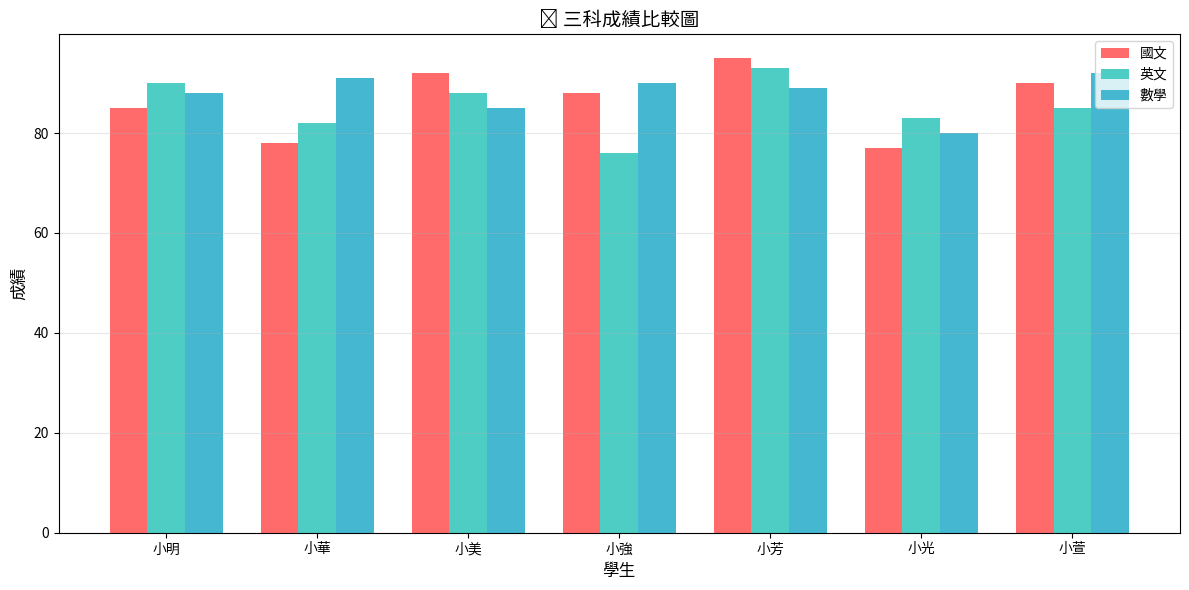

In [36]:
import numpy as np

# 設定資料
subjects = ['國文', '英文', '數學']
x = np.arange(len(df))
width = 0.25

# 繪製群組長條圖
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - width, df['國文'], width, label='國文', color='#FF6B6B')
ax.bar(x, df['英文'], width, label='英文', color='#4ECDC4')
ax.bar(x + width, df['數學'], width, label='數學', color='#45B7D1')

ax.set_xlabel('學生', fontsize=12)
ax.set_ylabel('成績', fontsize=12)
ax.set_title('📊 三科成績比較圖', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(df['姓名'])
ax.legend()
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('subject_comparison.png')
plt.show()

## 12. 繪製圓餅圖

/tmp/ipython-input-1702753099.py:19: UserWarning: Glyph 129383 (\N{PIE}) missing from font(s) Taipei Sans TC Beta.
  plt.tight_layout()
/tmp/ipython-input-1702753099.py:20: UserWarning: Glyph 129383 (\N{PIE}) missing from font(s) Taipei Sans TC Beta.
  plt.savefig('grade_distribution.png')
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129383 (\N{PIE}) missing from font(s) Taipei Sans TC Beta.
  fig.canvas.print_figure(bytes_io, **kw)


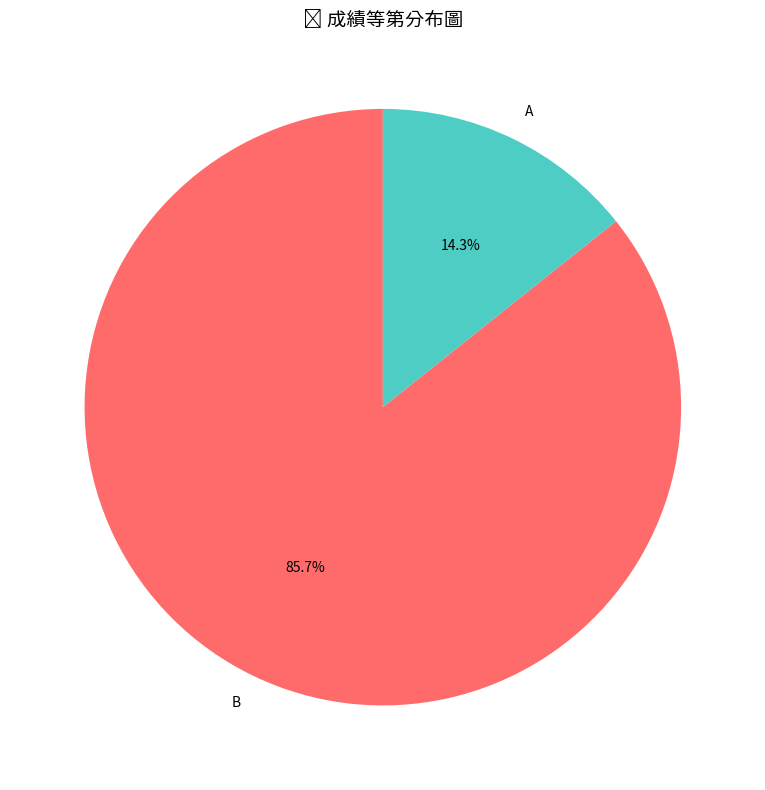

In [37]:
# 統計等第分布
df['平均'] = (df['國文'] + df['英文'] + df['數學']) / 3

def get_grade(avg):
    if avg >= 90: return 'A'
    elif avg >= 80: return 'B'
    elif avg >= 70: return 'C'
    else: return 'D'

df['等第'] = df['平均'].apply(get_grade)
grade_counts = df['等第'].value_counts()

# 繪製圓餅圖
plt.figure(figsize=(8, 8))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']
plt.pie(grade_counts, labels=grade_counts.index, autopct='%1.1f%%',
        colors=colors, startangle=90)
plt.title('🥧 成績等第分布圖', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('grade_distribution.png')
plt.show()

## 13. 完整成績分析系統 (類別設計)

In [39]:
class GradeAnalyzer:
    def __init__(self, csv_file):
        """初始化成績分析系統"""
        self.df = pd.read_csv(csv_file)
        self.calculate_statistics()

    def calculate_statistics(self):
        """計算基本統計資料"""
        self.df['總分'] = (self.df['國文'] +
                          self.df['英文'] +
                          self.df['數學'])
        self.df['平均'] = self.df['總分'] / 3
        self.df['排名'] = self.df['總分'].rank(ascending=False)

        # 計算等第
        def get_grade(avg):
            if avg >= 90: return 'A'
            elif avg >= 80: return 'B'
            elif avg >= 70: return 'C'
            elif avg >= 60: return 'D'
            else: return 'F'

        self.df['等第'] = self.df['平均'].apply(get_grade)
    def show_summary(self):
        """顯示統計摘要"""
        print("=" * 50)
        print("📊 成績統計摘要")
        print("=" * 50)

        for subject in ['國文', '英文', '數學']:
            print(f"\n【{subject}】")
            print(f"  平均: {self.df[subject].mean():.2f}")
            print(f"  最高: {self.df[subject].max()}")
            print(f"  最低: {self.df[subject].min()}")
            print(f"  標準差: {self.df[subject].std():.2f}")

    def find_student(self, name):
        """查詢特定學生成績"""
        student = self.df[self.df['姓名'] == name]
        if len(student) == 0:
            print(f"❌ 找不到學生：{name}")
            return

        print(f"\n👤 {name} 的成績報告")
        print("-" * 40)
        for col in ['國文', '英文', '數學', '總分', '平均', '排名', '等第']:
            print(f"{col}: {student[col].values[0]}")


    def plot_all_charts(self):
        """繪製所有統計圖表"""
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))

        # 1. 總分長條圖
        axes[0, 0].bar(self.df['姓名'], self.df['總分'], color='skyblue')
        axes[0, 0].set_title('總分排行榜')
        axes[0, 0].set_ylabel('總分')

        # 2. 平均成績折線圖
        sorted_df = self.df.sort_values('平均')
        axes[0, 1].plot(sorted_df['姓名'], sorted_df['平均'],
                       marker='o', color='green')
        axes[0, 1].set_title('平均成績趨勢')
        axes[0, 1].set_ylabel('平均')

        # 3. 等第分布圓餅圖
        grade_counts = self.df['等第'].value_counts()
        axes[1, 0].pie(grade_counts, labels=grade_counts.index,
                      autopct='%1.1f%%')
        axes[1, 0].set_title('等第分布')

        # 4. 各科成績盒鬚圖
        scores = [self.df['國文'], self.df['英文'], self.df['數學']]
        axes[1, 1].boxplot(scores, labels=['國文', '英文', '數學'])
        axes[1, 1].set_title('各科成績分布')
        axes[1, 1].set_ylabel('成績')

        plt.tight_layout()
        plt.savefig('complete_analysis.png')
        plt.show()


## 14. 使用完整分析系統

📊 成績統計摘要

【國文】
  平均: 86.43
  最高: 95
  最低: 77
  標準差: 6.85

【英文】
  平均: 85.29
  最高: 93
  最低: 76
  標準差: 5.65

【數學】
  平均: 87.86
  最高: 92
  最低: 80
  標準差: 4.14

👤 小明 的成績報告
----------------------------------------
國文: 85
英文: 90
數學: 88
總分: 263
平均: 87.66666666666667
排名: 4.0
等第: B


/tmp/ipython-input-2854682846.py:74: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 1].boxplot(scores, labels=['國文', '英文', '數學'])


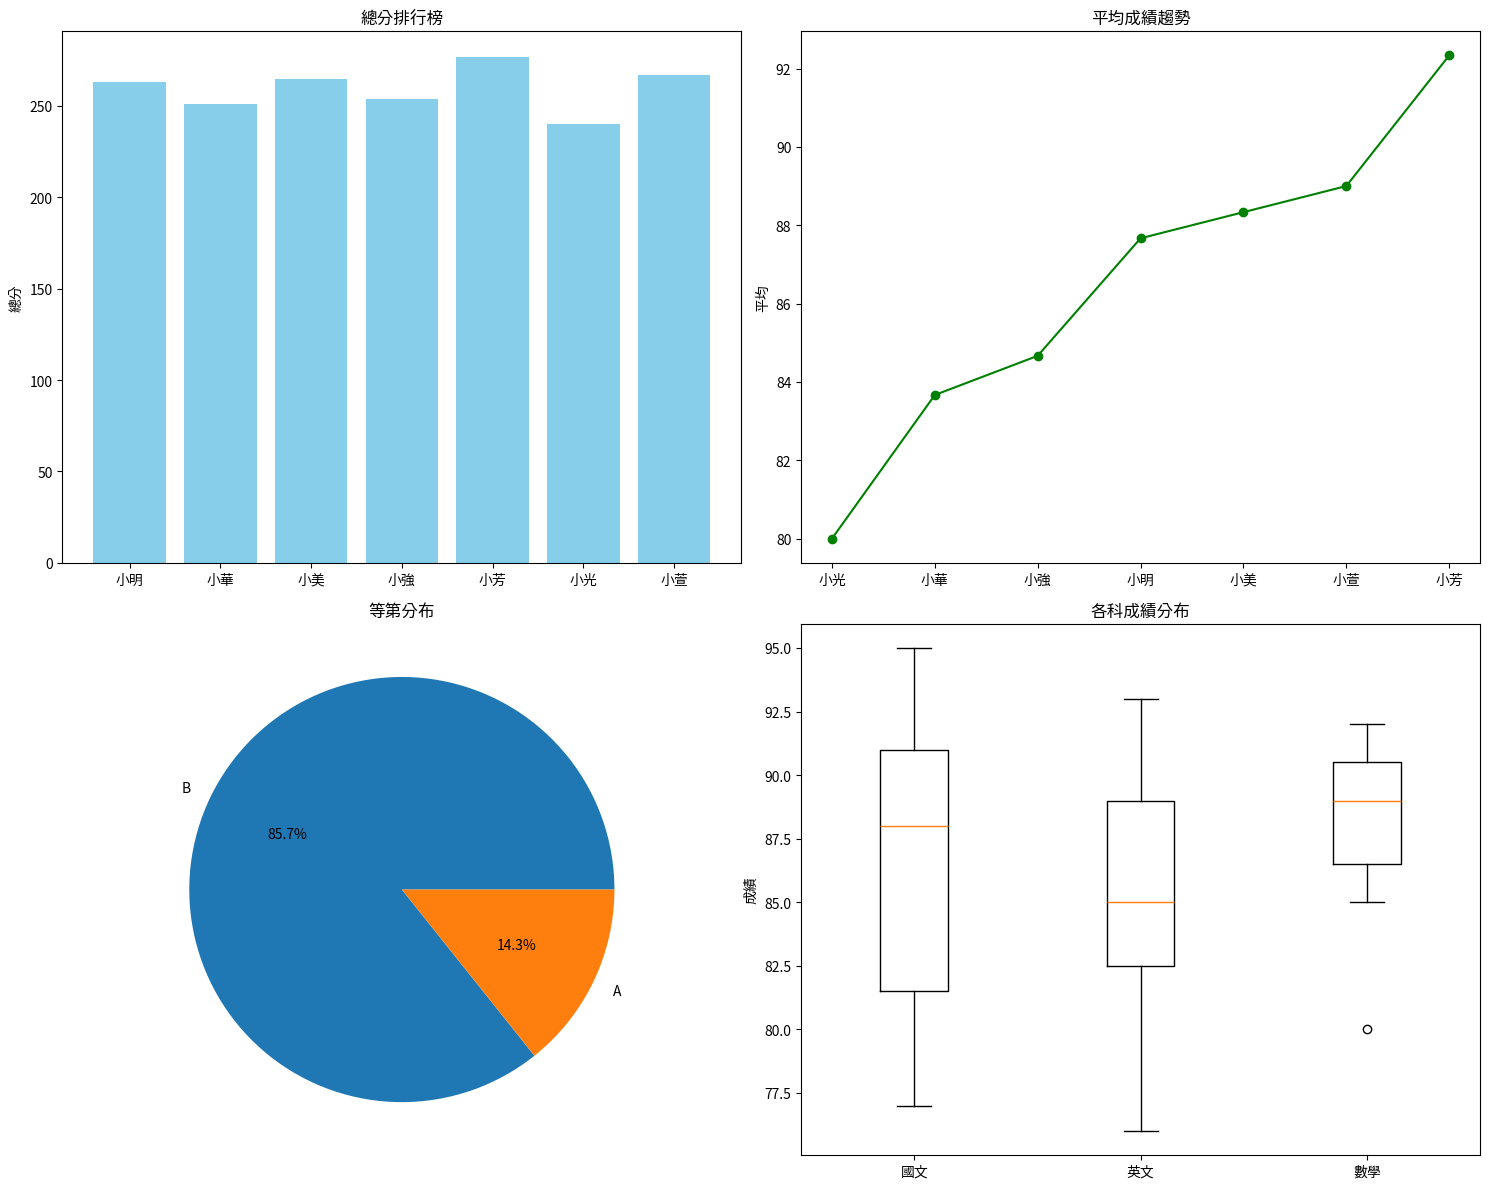


完整分析結果：
     學號  姓名  國文  英文  數學   總分         平均   排名 等第
0  1001  小明  85  90  88  263  87.666667  4.0  B
1  1002  小華  78  82  91  251  83.666667  6.0  B
2  1003  小美  92  88  85  265  88.333333  3.0  B
3  1004  小強  88  76  90  254  84.666667  5.0  B
4  1005  小芳  95  93  89  277  92.333333  1.0  A
5  1006  小光  77  83  80  240  80.000000  7.0  B
6  1007  小萱  90  85  92  267  89.000000  2.0  B


In [40]:
# 使用成績分析系統
analyzer = GradeAnalyzer('grades.csv')

# 顯示統計摘要
analyzer.show_summary()

# 查詢特定學生
analyzer.find_student('小明')

# 繪製所有圖表
analyzer.plot_all_charts()

# 查看完整資料
print("\n完整分析結果：")
print(analyzer.df)

In [41]:
# 將 analyzer.df 存為 new_grade.csv
analyzer.df.to_csv('new_grade.csv', index=False, encoding='utf-8')

print("✅ analyzer.df 已成功存儲為 new_grade.csv")

# 為了確認，我們可以讀取新檔案並顯示前幾行
print("\n📖 new_grade.csv 的內容：")
new_df = pd.read_csv('new_grade.csv')
print(new_df.head())

✅ analyzer.df 已成功存儲為 new_grade.csv

📖 new_grade.csv 的內容：
     學號  姓名  國文  英文  數學   總分         平均   排名 等第
0  1001  小明  85  90  88  263  87.666667  4.0  B
1  1002  小華  78  82  91  251  83.666667  6.0  B
2  1003  小美  92  88  85  265  88.333333  3.0  B
3  1004  小強  88  76  90  254  84.666667  5.0  B
4  1005  小芳  95  93  89  277  92.333333  1.0  A


## 練習與應用

以上範例涵蓋了Week 13課程的所有重點內容：
1. CSV檔案的建立與讀取
2. Pandas DataFrame和Series的基本操作
3. 資料篩選、排序與計算
4. 使用Matplotlib繪製各種圖表
5. 物件導向程式設計應用

建議同學們：
- 修改範例中的資料，觀察結果變化
- 嘗試新增更多學科或學生資料
- 練習不同的篩選條件和統計方法
- 美化圖表的樣式和配色